# Week 08, Graph2

- Data Load
- Network Analysis
  - small world
  - motif
  - graph role
  - community detection

# 1. data load

In [4]:
! pip install networkx

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

## 1) data download

In [37]:
import urllib.request as urllib
import io
import zipfile

In [38]:
url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

In [39]:
sock = urllib.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

In [40]:
zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data

In [41]:
print(txt)

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)



In [42]:
# print degree for each team - number of games
for n, d in G.degree():
    print(f"{n:20} {d:2}")

BrighamYoung         12
FloridaState         12
Iowa                 12
KansasState          12
NewMexico            11
TexasTech            12
PennState            12
SouthernCalifornia   12
ArizonaState         11
SanDiegoState        11
Baylor               10
NorthTexas           10
NorthernIllinois     10
Northwestern         11
WesternMichigan      10
Wisconsin            12
Wyoming              11
Auburn               11
Akron                11
VirginiaTech         11
Alabama              11
UCLA                 11
Arizona              11
Utah                 11
ArkansasState        10
NorthCarolinaState   11
BallState            10
Florida              11
BoiseState            9
BostonCollege        11
WestVirginia         11
BowlingGreenState    11
Michigan             11
Virginia             10
Buffalo              11
Syracuse             11
CentralFlorida        8
GeorgiaTech          11
CentralMichigan      11
Purdue               11
Colorado             11
ColoradoState   

## 2) draw graph

## Node Centrality
- degree centrality : 연결된 node가 많을 수록 큼. nx.degree_centrality(g), nx.in_degree_centrality(g), nx.out_degree_centrality(g)
- closeness centrality : 모든 node와의 거리가 가까울 수록 큼. nx.closeness_centrality(g)
- betweenness centrality : 노드 간의 경로에 있을 수록 큼. nx.betweenness_centrality(g, normalized=True)
- eigenvector centrality : 큰 네트워크와 연결되있는 사람일 수록 큼. nx.eigenvector_centrality(g)

In [49]:
import pandas as pd

In [47]:
def viewer(_dict_data, col_name):
    df = pd.DataFrame().from_dict(_dict_data, orient='index', columns=[col_name])
    print(df.sort_values(col_name, ascending=False).head(10))
    return df

In [50]:
degree_centrality = nx.degree_centrality(G)
degree_centrality = viewer(degree_centrality, 'degree_centrality')
degree_centrality

                    degree_centrality
BrighamYoung                 0.105263
SouthernCalifornia           0.105263
Nevada                       0.105263
Wisconsin                    0.105263
NevadaLasVegas               0.105263
FloridaState                 0.105263
SouthernMethodist            0.105263
Tulsa                        0.105263
PennState                    0.105263
TexasTech                    0.105263


,degree_centrality
BrighamYoung,0.105263
FloridaState,0.105263
Iowa,0.105263
KansasState,0.105263
NewMexico,0.096491
...,...
TexasChristian,0.096491
California,0.096491
AlabamaBirmingham,0.087719
Arkansas,0.087719


In [52]:
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality = viewer(closeness_centrality, 'closeness_centrality')
closeness_centrality

               closeness_centrality
LouisianaTech              0.436782
Navy                       0.435115
Tulsa                      0.430189
Indiana                    0.426966
PennState                  0.425373
BrighamYoung               0.423792
Wyoming                    0.423792
Wisconsin                  0.423792
Cincinnati                 0.423792
ArkansasState              0.423792


,closeness_centrality
BrighamYoung,0.423792
FloridaState,0.413043
Iowa,0.407143
KansasState,0.420664
NewMexico,0.402827
...,...
TexasChristian,0.413043
California,0.382550
AlabamaBirmingham,0.395833
Arkansas,0.377483


In [54]:
betweenness_centrality = nx.betweenness_centrality(G,  normalized=True)
betweenness_centrality = viewer(betweenness_centrality, 'betweenness_centrality')
betweenness_centrality

                 betweenness_centrality
NotreDame                      0.033533
BrighamYoung                   0.032490
Navy                           0.029161
LouisianaTech                  0.028823
CentralMichigan                0.025187
NewMexicoState                 0.024139
Cincinnati                     0.023836
KansasState                    0.023070
Alabama                        0.023046
Wyoming                        0.022213


,betweenness_centrality
BrighamYoung,0.032490
FloridaState,0.017621
Iowa,0.013122
KansasState,0.023070
NewMexico,0.010664
...,...
TexasChristian,0.014370
California,0.007516
AlabamaBirmingham,0.011582
Arkansas,0.006498


(-0.9941775297138812, 1.09496083474828, -0.937125991274918, 0.8133459942274107)

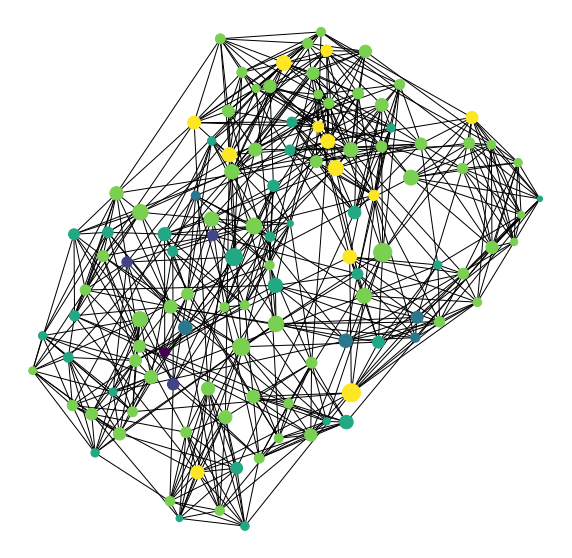

In [45]:
#visualize the network such that the node color varies with Degree and node size with Betweenness Centrality.

pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G,normalized=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [55]:
eigenvector_centrality = nx.eigenvector_centrality(G)
eigenvector_centrality = viewer(eigenvector_centrality, 'eigenvector_centrality')
eigenvector_centrality

                    eigenvector_centrality
Nevada                            0.127683
SouthernMethodist                 0.122577
Tulsa                             0.121289
SouthernCalifornia                0.120724
SanJoseState                      0.119902
FresnoState                       0.119568
Hawaii                            0.117695
Rice                              0.117246
TexasElPaso                       0.116471
Wisconsin                         0.116303


,eigenvector_centrality
BrighamYoung,0.106503
FloridaState,0.096385
Iowa,0.116262
KansasState,0.106250
NewMexico,0.101190
...,...
TexasChristian,0.114943
California,0.111198
AlabamaBirmingham,0.073015
Arkansas,0.070452


# 2. Network Analysis
- degree, centrality 등은 5주차 [lab]graph1 참고

## 1) Small world
- reference : https://networkx.org/documentation/stable/reference/algorithms/smallworld.html
- sigma = C/Cr / L/Lr
- C and L are respectively the average clustering coefficient and average shortest path length of G. 
- Cr and Lr are respectively the average clustering coefficient and average shortest path length of an equivalent random graph.
- A graph is commonly classified as small-world if sigma>1.

In [56]:
from networkx.algorithms import smallworld as sw

In [58]:
g_random = sw.random_reference(G, niter=20, seed=2021)
print(nx.info(g_random))

Name: 
Type: Graph
Number of nodes: 115
Number of edges: 613
Average degree:  10.6609


In [59]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 115
Number of edges: 613
Average degree:  10.6609


In [60]:
C = nx.average_clustering(G)
L = nx.average_shortest_path_length(G)

In [61]:
Cr = nx.average_clustering(g_random)
Lr = nx.average_shortest_path_length(g_random)

In [62]:
A = (C / Cr)
B = (L / Lr)

In [63]:
sigma =  A / B
sigma

4.643321690024574

In [64]:
sw_sigma = sw.sigma(G, niter=20, seed=2021)
sw_sigma

4.539317382484467

## 2) motif

In [65]:
# https://pypi.org/project/netsci/
! pip install netsci

     |████████████████████████████████| 450kB 8.0MB/s 


In [66]:
import numpy as np
import netsci.visualization as nsv
import netsci.metrics.motifs as nsm

In [67]:
# networkx to numpy
g_np = nx.convert_matrix.to_numpy_matrix(G,dtype=np.integer)
g_r_np = nx.convert_matrix.to_numpy_matrix(g_random,dtype=np.integer)

print(g_np.shape,g_r_np.shape)

(115, 115) (115, 115)


In [68]:
# recurring : count subgraphs
f_real = nsm.motifs(g_np)[3:]
f_random = nsm.motifs(g_r_np)[3:]
print(f_real)
print(f_random)

[   0    0    0    0    0    0    0 3537    0    0    0    0  810]
[   0    0    0    0    0    0    0 5499    0    0    0    0  156]


[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


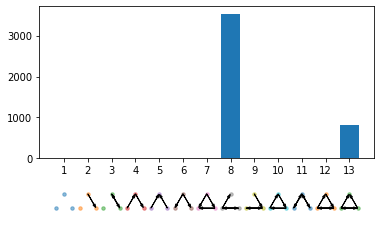

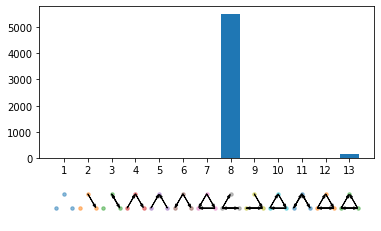

In [69]:
# visualization of motifs
nsv.bar_motifs(f_real)
nsv.bar_motifs(f_random)

## 3) graph role
- reference: https://github.com/dkaslovsky/GraphRole
- https://pypi.org/project/graphrole/

In [70]:
! pip install graphrole

In [71]:
from pprint import pprint
import seaborn as sns

from graphrole import RecursiveFeatureExtractor, RoleExtractor

In [73]:
# extract features
feature_extractor = RecursiveFeatureExtractor(G)
features = feature_extractor.extract_features()

In [74]:
print(features)

                   degree(mean)(mean)  ...  internal_edges
AirForce                    10.868485  ...              33
Akron                       10.446606  ...              33
Alabama                     10.593595  ...              31
AlabamaBirmingham           10.541894  ...              23
Arizona                     10.926446  ...              39
...                               ...  ...             ...
WashingtonState             10.811662  ...              40
WestVirginia                10.714601  ...              37
WesternMichigan             10.542424  ...              27
Wisconsin                   11.047980  ...              35
Wyoming                     10.855096  ...              34

[115 rows x 12 columns]


In [75]:
# assign node roles
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)
node_roles = role_extractor.roles

In [76]:
print('\nNode role assignments:')
pprint(node_roles)

print('\nNode role membership by percentage:')
print(role_extractor.role_percentage.round(2))


Node role assignments:
{'AirForce': 'role_4',
 'Akron': 'role_1',
 'Alabama': 'role_1',
 'AlabamaBirmingham': 'role_1',
 'Arizona': 'role_4',
 'ArizonaState': 'role_3',
 'Arkansas': 'role_1',
 'ArkansasState': 'role_1',
 'Army': 'role_1',
 'Auburn': 'role_1',
 'BallState': 'role_1',
 'Baylor': 'role_4',
 'BoiseState': 'role_1',
 'BostonCollege': 'role_1',
 'BowlingGreenState': 'role_1',
 'BrighamYoung': 'role_0',
 'Buffalo': 'role_1',
 'California': 'role_4',
 'CentralFlorida': 'role_1',
 'CentralMichigan': 'role_1',
 'Cincinnati': 'role_4',
 'Clemson': 'role_0',
 'Colorado': 'role_4',
 'ColoradoState': 'role_4',
 'Connecticut': 'role_5',
 'Duke': 'role_3',
 'EastCarolina': 'role_2',
 'EasternMichigan': 'role_1',
 'Florida': 'role_1',
 'FloridaState': 'role_0',
 'FresnoState': 'role_4',
 'Georgia': 'role_1',
 'GeorgiaTech': 'role_3',
 'Hawaii': 'role_4',
 'Houston': 'role_4',
 'Idaho': 'role_1',
 'Illinois': 'role_4',
 'Indiana': 'role_4',
 'Iowa': 'role_4',
 'IowaState': 'role_4',
 '

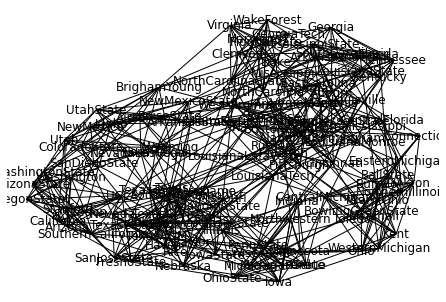

In [78]:
# build color palette for plotting
unique_roles = sorted(set(node_roles.values()))
color_map = sns.color_palette('Paired', n_colors=len(unique_roles))
# map roles to colors
role_colors = {role: color_map[i] for i, role in enumerate(unique_roles)}
# build list of colors for all nodes in G
node_colors = [role_colors[node_roles[node]] for node in g.nodes]

# plot graph
plt.figure()
nx.draw(
    G,
    pos=nx.spring_layout(G, seed=42),
    with_labels=True,
    node_color=node_colors,
)
plt.show()

## 4) Community Detection

In [87]:
from networkx.algorithms import community
list(community.asyn_fluidc(G,k=12))

[{'Baylor',
  'LouisianaLafayette',
  'Oklahoma',
  'OklahomaState',
  'Texas',
  'TexasA&M',
  'TexasTech'},
 {'ArkansasState',
  'BoiseState',
  'Idaho',
  'NewMexicoState',
  'NorthTexas',
  'UtahState'},
 {'Akron',
  'BallState',
  'BowlingGreenState',
  'Buffalo',
  'CentralFlorida',
  'CentralMichigan',
  'Connecticut',
  'EasternMichigan',
  'Kent',
  'Marshall',
  'MiamiOhio',
  'NorthernIllinois',
  'Ohio',
  'Toledo',
  'WesternMichigan'},
 {'BostonCollege',
  'MiamiFlorida',
  'Navy',
  'NotreDame',
  'Pittsburgh',
  'Rutgers',
  'Syracuse',
  'Temple',
  'VirginiaTech',
  'WestVirginia'},
 {'Alabama',
  'Arkansas',
  'Auburn',
  'Florida',
  'Georgia',
  'Kentucky',
  'LouisianaMonroe',
  'LouisianaState',
  'MiddleTennesseeState',
  'Mississippi',
  'MississippiState',
  'SouthCarolina',
  'Tennessee',
  'Vanderbilt'},
 {'Arizona',
  'ArizonaState',
  'California',
  'Oregon',
  'OregonState',
  'SouthernCalifornia',
  'Stanford',
  'UCLA',
  'Washington',
  'WashingtonSta

In [83]:
G.nodes.data()

NodeDataView({'BrighamYoung': {'value': 7}, 'FloridaState': {'value': 0}, 'Iowa': {'value': 2}, 'KansasState': {'value': 3}, 'NewMexico': {'value': 7}, 'TexasTech': {'value': 3}, 'PennState': {'value': 2}, 'SouthernCalifornia': {'value': 8}, 'ArizonaState': {'value': 8}, 'SanDiegoState': {'value': 7}, 'Baylor': {'value': 3}, 'NorthTexas': {'value': 10}, 'NorthernIllinois': {'value': 6}, 'Northwestern': {'value': 2}, 'WesternMichigan': {'value': 6}, 'Wisconsin': {'value': 2}, 'Wyoming': {'value': 7}, 'Auburn': {'value': 9}, 'Akron': {'value': 6}, 'VirginiaTech': {'value': 1}, 'Alabama': {'value': 9}, 'UCLA': {'value': 8}, 'Arizona': {'value': 8}, 'Utah': {'value': 7}, 'ArkansasState': {'value': 10}, 'NorthCarolinaState': {'value': 0}, 'BallState': {'value': 6}, 'Florida': {'value': 9}, 'BoiseState': {'value': 11}, 'BostonCollege': {'value': 1}, 'WestVirginia': {'value': 1}, 'BowlingGreenState': {'value': 6}, 'Michigan': {'value': 2}, 'Virginia': {'value': 0}, 'Buffalo': {'value': 6}, 'S

In [86]:
nx.write_graphml_lxml(G, "football.graphml", infer_numeric_types=True)